In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
dataset = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label' , 'message'])

In [3]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.shape

(5572, 2)

In [5]:
freq = dataset['label'].value_counts()
freq

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
dataset.isn

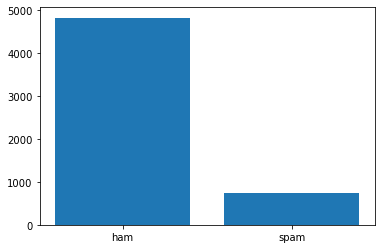

In [6]:
mpl.bar(freq.index , freq.values)
mpl.show()

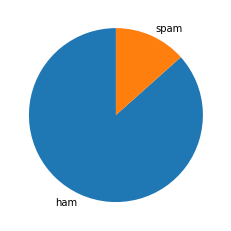

In [7]:
mpl.pie(freq.values, labels=freq.index, startangle=90)
mpl.show()

In [8]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer(
    lowercase=True,         
    stop_words='english',   
    token_pattern=r'\b\w+\b',
    max_features = 1000
)

In [11]:
vocab = vectorizer.fit(dataset['message'])
vocab.vocabulary_

{'point': 657,
 'crazy': 206,
 'available': 87,
 'n': 580,
 'great': 371,
 'world': 972,
 'e': 273,
 'got': 368,
 'wat': 934,
 'ok': 611,
 'lar': 468,
 'wif': 950,
 'u': 890,
 'free': 327,
 'entry': 289,
 '2': 22,
 'wkly': 960,
 'comp': 185,
 'win': 953,
 'cup': 211,
 'final': 314,
 'text': 836,
 'receive': 696,
 'question': 678,
 'std': 803,
 'txt': 886,
 'rate': 685,
 't': 824,
 'c': 135,
 's': 720,
 'apply': 76,
 'dun': 270,
 'say': 730,
 'early': 275,
 'nah': 582,
 'don': 257,
 'think': 845,
 'goes': 360,
 'usf': 905,
 'freemsg': 328,
 'hey': 402,
 '3': 33,
 'week': 940,
 'word': 967,
 'd': 217,
 'like': 490,
 'fun': 340,
 'xxx': 985,
 'send': 745,
 '1': 7,
 '50': 39,
 'brother': 128,
 'speak': 790,
 'treat': 875,
 'set': 751,
 'callertune': 139,
 'press': 666,
 '9': 50,
 'copy': 198,
 'friends': 332,
 'winner': 955,
 'valued': 912,
 'network': 588,
 'customer': 214,
 'selected': 741,
 '900': 51,
 'prize': 671,
 'reward': 708,
 'claim': 168,
 'code': 173,
 'valid': 911,
 '12': 14,


In [12]:
Features = vectorizer.fit_transform(dataset['message']).toarray()

In [13]:
Features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
Features.shape

(5572, 1000)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
dataset['encoded_labels'] = LabelEncoder().fit_transform(dataset['label'])

In [17]:
dataset.head()

,label,message,encoded_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
Labels = dataset['encoded_labels']

In [19]:
Labels

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: encoded_labels, Length: 5572, dtype: int64

In [20]:
Features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Feature_train , Feature_test , Label_train , Label_test = train_test_split(Features , Labels , test_size = 0.2)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [24]:
model = MultinomialNB()

In [25]:
model.fit(Feature_train , Label_train)

MultinomialNB()

In [26]:
Predictions = model.predict(Feature_test)

In [27]:
Predictions

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

In [29]:
Score = accuracy_score(Label_test , Predictions)
Score

0.9856502242152466

In [30]:
Report = classification_report(Label_test , Predictions)
Report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       980\n           1       0.94      0.94      0.94       135\n\n    accuracy                           0.99      1115\n   macro avg       0.97      0.97      0.97      1115\nweighted avg       0.99      0.99      0.99      1115\n'

In [31]:
Matrix = confusion_matrix(Label_test , Predictions)
Matrix

array([[972,   8],
       [  8, 127]])

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(model, Feature_train, Label_train, cv=5, scoring='accuracy')
scores

array([0.98766816, 0.98318386, 0.98540965, 0.98428732, 0.97194164])

In [34]:
Predictions2 = model.predict(Feature_train)

In [35]:
accuracy2 = accuracy_score(Label_train , Predictions2)
accuracy2

0.9860892977339017

In [36]:
Matrix2 = confusion_matrix(Label_train , Predictions2)
Matrix2

array([[3813,   32],
       [  30,  582]])

In [46]:
def decode(Pred):
    if Pred == 1:
        return "spam"
    else:
        return "ham"

In [47]:
decode(Prediction)

'ham'

In [48]:
def Spam_Detector():
    Email = input()
    Email_vector = vectorizer.transform([Email]).toarray()
    Prediction = decodemodel.predict(Email_vector)
    Ret = decode(Prediction)
    return Ret

In [50]:
Spam_Detector()

Free discount 50% 


'spam'